# Section 3: Training a Supervised Learning Model
### Lecture 8: Training a Baseline Logistic Regression Model using scikit-learn
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('credit_card.csv')

y = df['Class']
X = df.drop(['Class','Amount','Time'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [2]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [3]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Introducing the Confusion Matrix
- Acts as a cross section between the ground truth and the predictions that the trained model makes
- In a binary classification context, the confusion matrix reports on the classification performance of the model:
    - True negatives - actually non-fraudulent and correctly classified as non-fraudulent
    - False positives - actually non-fraudulent but incorrectly classified as fraud
    - False negatives - actually fraud but incorrectly classified as being non-fraudulent
    - True positives - actually fraud and correctly classified as fraud
- We're trying to detect fraud, so the "positive" relates to fraud while "negative" refers to non-fraudulent.
- "True" relates to correct predictions, whereas "false" refers to incorrect predictions.
- Many performance metrics are derived from the elements of the confusion matrix (Section 4), therefore it is foundational for understanding how to measure performance for classification problems.

In [4]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[28426,     6],
       [   15,    34]], dtype=int64)

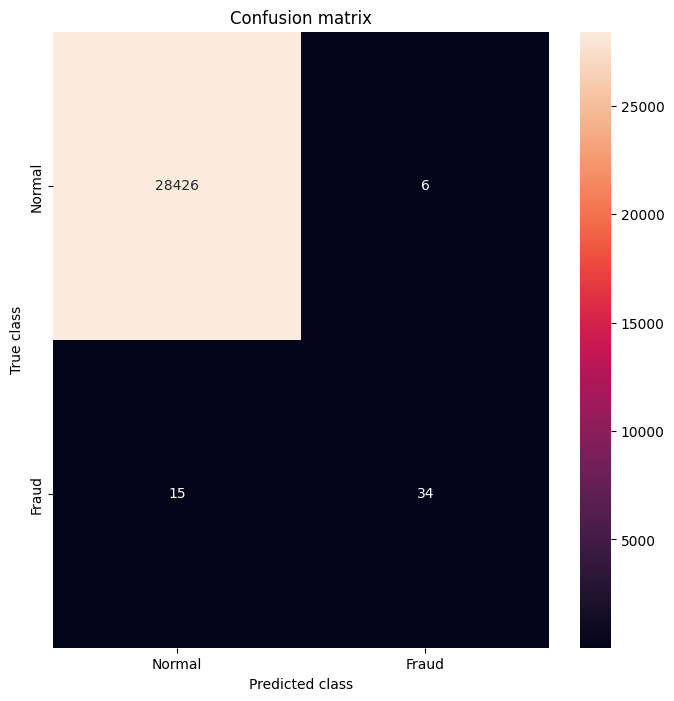

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

LABELS = ["Normal", "Fraud"]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()